In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv(r'C:\Users\Ajay Babu Gorantla\OneDrive\Documents\Ajay\PSU\Fall_2021\Machine_Learning\Assignments\Project\dataset\train.csv')

In [3]:
test_df = pd.read_csv(r'C:\Users\Ajay Babu Gorantla\OneDrive\Documents\Ajay\PSU\Fall_2021\Machine_Learning\Assignments\Project\dataset\test.csv')

In [4]:
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df = np.array(train_df, dtype='float64')
test_df = np.array(test_df, dtype='float64')

In [6]:
train_df = pd.read_csv(r'C:\Users\Ajay Babu Gorantla\OneDrive\Documents\Ajay\PSU\Fall_2021\Machine_Learning\Assignments\Project\dataset\train.csv')
test_df = pd.read_csv(r'C:\Users\Ajay Babu Gorantla\OneDrive\Documents\Ajay\PSU\Fall_2021\Machine_Learning\Assignments\Project\dataset\test.csv')


In [7]:
train_data = np.array(train_df, dtype='float64')
test_data = np.array(test_df, dtype='float64')


In [9]:
x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]


In [10]:
x_train, x_validate, y_train, y_validate  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

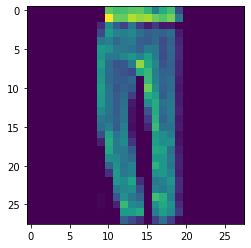

In [11]:
test_image = x_train[50, :].reshape((28,28))
plt.imshow(test_image)
plt.show()

In [14]:
print(y_train[50])

1.0


In [15]:
print(x_train.shape[0])

48000


In [16]:
#Building a CNN

image_rows = 28
image_cols = 28
batch_size = 100
image_shape = (image_rows, image_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)





In [17]:
print('x_train shape: {}'.format(x_train.shape))

x_train shape: (48000, 28, 28, 1)


In [18]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [19]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = image_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='relu')])

In [21]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum = 0.2),
    metrics=['accuracy']
)

In [22]:
model.fit(x_train, y_train, batch_size=batch_size, epochs = 10, 
validation_data=(x_validate,y_validate))

Epoch 1/10
480/480 [==============================] - 9s 19ms/step - loss: 2.2928 - accuracy: 0.1940 - val_loss: 1.7154 - val_accuracy: 0.2473
Epoch 2/10
480/480 [==============================] - 9s 19ms/step - loss: 3.8748 - accuracy: 0.3132 - val_loss: 6.7667 - val_accuracy: 0.2803
Epoch 3/10
480/480 [==============================] - 9s 19ms/step - loss: 5.4134 - accuracy: 0.1164 - val_loss: 5.3246 - val_accuracy: 0.0988
Epoch 4/10
480/480 [==============================] - 9s 18ms/step - loss: 5.2966 - accuracy: 0.1003 - val_loss: 5.3246 - val_accuracy: 0.0988
Epoch 5/10
480/480 [==============================] - 9s 18ms/step - loss: 5.2977 - accuracy: 0.1003 - val_loss: 5.3246 - val_accuracy: 0.0988
Epoch 6/10
480/480 [==============================] - 9s 18ms/step - loss: 5.2977 - accuracy: 0.1003 - val_loss: 5.3246 - val_accuracy: 0.0988
Epoch 7/10
480/480 [==============================] - 9s 18ms/step - loss: 5.2977 - accuracy: 0.1003 - val_loss: 5.3246 - val_accuracy: 0.0988

In [27]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.1),
    metrics=['accuracy']
)

In [28]:
model.fit(x_train, y_train, batch_size = batch_size, epochs = 10, 
                verbose = 1, validation_data=(x_validate, y_validate))

Epoch 1/10
480/480 [==============================] - 10s 20ms/step - loss: 14.4636 - accuracy: 0.1007 - val_loss: 14.5412 - val_accuracy: 0.0978
Epoch 2/10
480/480 [==============================] - 9s 19ms/step - loss: 14.4976 - accuracy: 0.1005 - val_loss: 14.5412 - val_accuracy: 0.0978
Epoch 3/10
480/480 [==============================] - 9s 19ms/step - loss: 14.4976 - accuracy: 0.1005 - val_loss: 14.5412 - val_accuracy: 0.0978
Epoch 4/10
480/480 [==============================] - 9s 19ms/step - loss: 14.4976 - accuracy: 0.1005 - val_loss: 14.5412 - val_accuracy: 0.0978
Epoch 5/10
480/480 [==============================] - 9s 19ms/step - loss: 14.4976 - accuracy: 0.1005 - val_loss: 14.5412 - val_accuracy: 0.0978
Epoch 6/10
480/480 [==============================] - 9s 18ms/step - loss: 14.4976 - accuracy: 0.1005 - val_loss: 14.5412 - val_accuracy: 0.0978
Epoch 7/10
480/480 [==============================] - 9s 19ms/step - loss: 14.4975 - accuracy: 0.1005 - val_loss: 14.5412 - val_a

In [25]:
evalulation_score = model.evaluate(x_test, y_test, verbose = 0)

    print('    test loss : {:.4f}'.format(evalulation_score[0]))
    print('test accuracy : {:.4f}'.format(evalulation_score[1]))


IndentationError: unexpected indent (Temp/ipykernel_33268/420584161.py, line 3)

In [26]:
evalulation_score = model.evaluate(x_test, y_test, verbose = 0)

print('    test loss : {:.4f}'.format(evalulation_score[0]))
print('test accuracy : {:.4f}'.format(evalulation_score[1]))


    test loss : 1.3895
test accuracy : 0.1689
